# Drvo na odluchuvanje
Дрво на одлучување е граф со дрвенеста структура каде секој јазол е прашање кое го дели на неколку дела даденото множество податоци. Врските во дрвото се одговорите на прашањето поставено од јазолот. Листовите на дрвото се излезите кои ќе ги произведе дрвото за даден влезен податок. 

Дрвото на одлучување ги класифицира дадените влезни податоци така што ќе започне од коренот и одејќи од јазол на јазол ќе стигне до некој лист чија вредност е излез за дадениот влезен податок.

Еве пример за дрво на одлучување кое ќе ни одговори кое превозно средство да го искористиме во зависност од моменталната состојба на денот во кој се наоѓаме.
![Пример за дрво на одлучување](images/decision_tree_example.png)

In [22]:
import numpy as np
import pandas as pd

In [23]:
df = pd.DataFrame(
    [['Sun', 44, True, 'Walk'],
     ['Sun', 23, False, 'Bus'],
     ['Sun', 31, True, 'Walk'],
     ['Sun', 7, False, 'Bus'],
     ['Sun', 19, True, 'Bus'],
     ['Cloud', 34, True, 'Walk'],
     ['Cloud', 16, False, 'Bus'],
     ['Cloud', 6, True, 'Walk'],
     ['Cloud', 25, True, 'Walk'],
     ['Cloud', 71, False, 'Bus'],
     ['Rain', 12, False, 'Bus'],
     ['Rain', 34, True, 'Bus']], columns=['Wheather', 'Time', 'Hungry', 'Transport'])
df

,Wheather,Time,Hungry,Transport
0,Sun,44,True,Walk
1,Sun,23,False,Bus
2,Sun,31,True,Walk
3,Sun,7,False,Bus
4,Sun,19,True,Bus
5,Cloud,34,True,Walk
6,Cloud,16,False,Bus
7,Cloud,6,True,Walk
8,Cloud,25,True,Walk
9,Cloud,71,False,Bus


se bira koj da bide root spored toa koj ima najgolema informaciska pridobivka

Алгоритамот е алчен бидејќи секогаш ја одбира најдобрата поделба само за моменталната распределба на податоците, а не ја гледа најдобрата можност генерално за целото дрво.

Алгоритамот подразбира дека сите карактеристики се дискретни, а класификацијата е бинарна. 

ентропијата е мерка за неред во едно множество. За нашиот проблем ентропијата ќе ни каже дали во едно многжество податоци, како претходно со `+` и `-`, имаме хомогеност или пак не. Ентропијата $H$ во теоријата на информации ја пресметуваме според равенката на научникот [Клод Шенон](https://en.wikipedia.org/wiki/Claude_Shannon)

$$ H = \sum_i - p_i \log p_i$$
За алгоритамот ID3, неговата бинарна класификација, и дадено множество $S$ каде излезите се означени со `+` и `-`, ентропијата ќе ја запишуваме како

$$ H(S) = - p_+ \log_2 p_+ - p_- \log_2 p_- $$

каде $p_+$ е подмножеството на $S$ каде излезот е `+`, а $p_-$ е подмножеството на $S$ каде излезот е `-`.

Вредноста која ќе ја добиеме е реален број. На пример, за 30 податоци каде 14 се `+`, а 16 се `-`, ќе добиеме дека ентропијата е 0.996. 

In [24]:
def entropy(a, b):
    if a == 0 or b == 0:
        return 0
    m = a + b
    return - a/m * np.log2(a/m) - b/m * np.log2(b/m)

entropy(14, 16)

0.9967916319816366

In [25]:
def entropy_of_dataset(df, output_column, class_1, class_2):
    class_1_data = df.query(f"{output_column} == '{class_1}'")
    class_2_data = df.query(f"{output_column} == '{class_2}'")
    return entropy(class_1_data.shape[0], class_2_data.shape[0])

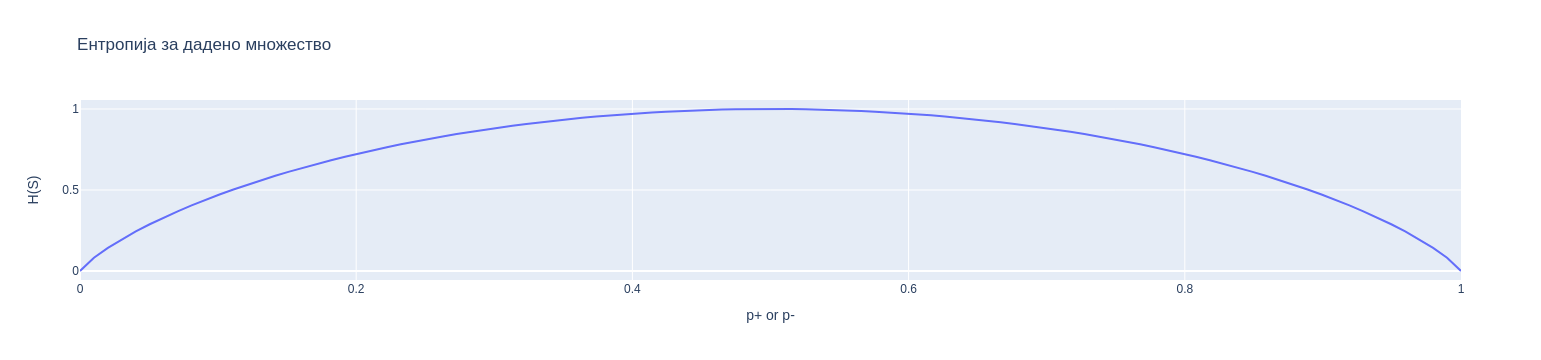

In [26]:
x = np.linspace(start=0, stop=1, num=100)
y = np.array([entropy(p, 1-p) for p in x])

from plotly import graph_objects as go
fig = go.Figure(go.Scatter(x=x, y=y))
fig.update_layout(title='Ентропија за дадено множество', xaxis_title='p+ or p-', yaxis_title='H(S)')

Од тука можеме да видиме дека ентропијата е 0 ако сите податоци од едно множество припаѓаат на една класа. Најголема е кога има ист број податоци од двете класи.

In [27]:
df['Time>30']=df['Time']>30
df=df[['Wheather', 'Time', 'Time>30','Hungry', 'Transport']]
df

,Wheather,Time,Time>30,Hungry,Transport
0,Sun,44,True,True,Walk
1,Sun,23,False,False,Bus
2,Sun,31,True,True,Walk
3,Sun,7,False,False,Bus
4,Sun,19,False,True,Bus
5,Cloud,34,True,True,Walk
6,Cloud,16,False,False,Bus
7,Cloud,6,False,True,Walk
8,Cloud,25,False,True,Walk
9,Cloud,71,True,False,Bus


In [28]:
def entropy_of_dataset(df, output_column, class_1, class_2):
    class_1_data = df.query(f"{output_column} == '{class_1}'")
    class_2_data = df.query(f"{output_column} == '{class_2}'")
    return entropy(class_1_data.shape[0], class_2_data.shape[0])

In [29]:
output_column = 'Transport'
class_1 = 'Bus'
class_2 = 'Walk'
h_before_split=entropy_of_dataset(df, output_column, class_1, class_2)
h_before_split

0.9798687566511528

In [30]:
sun_data = df.query("Wheather == 'Sun'")
cloud_data = df.query("Wheather == 'Cloud'")
rain_data = df.query("Wheather == 'Rain'")

h_sun_data = entropy_of_dataset(sun_data, output_column, class_1, class_2)
h_cloud_data = entropy_of_dataset(cloud_data, output_column, class_1, class_2)
h_rain_data = entropy_of_dataset(rain_data, output_column, class_1, class_2)
factor_sun_data = sun_data.shape[0] / df.shape[0]
factor_cloud_data = cloud_data.shape[0] / df.shape[0]
factor_rain_data = rain_data.shape[0] / df.shape[0]

h_after_split_wheather = factor_sun_data * h_sun_data + factor_cloud_data * h_cloud_data + factor_rain_data * h_rain_data
information_gain_wheather = h_before_split - h_after_split_wheather

In [31]:
time_over30=df.query("Time>30 == 'True'")
time_under30=df.query("Time>30 == 'False'")
h_over=entropy_of_dataset(time_over30, output_column, class_1, class_2)
h_under=entropy_of_dataset(time_under30, output_column, class_1, class_2)
factor_over=time_over30.shape[0]/df.shape[0]
factor_under=time_under30.shape[0]/df.shape[0]
h_after_split_time=factor_over*h_over+factor_under*h_under
info_gain_time=h_before_split-h_after_split_time

In [32]:
hungry_yes=df.query("Hungry == 'True'")
hungry_no=df.query("Hungry == 'False'")
h_yes=entropy_of_dataset(hungry_yes, output_column, class_1, class_2)
h_no=entropy_of_dataset(hungry_no, output_column, class_1, class_2)
factor_yes=hungry_yes.shape[0]/df.shape[0]
factor_no=hungry_no.shape[0]/df.shape[0]
h_after_split_hungry=factor_yes*h_yes+factor_no*h_no
info_gain_hungry=h_before_split-h_after_split_hungry

In [33]:
print('najgolem informaciski gain ima:')
if info_gain_hungry>info_gain_time and info_gain_hungry>information_gain_wheather:
    print(f'kolona Hungry: {info_gain_hungry}')
if info_gain_hungry<info_gain_time and info_gain_time>information_gain_wheather:
    print(f'kolona Hungry: {info_gain_time}')
if information_gain_wheather>info_gain_hungry and information_gain_wheather>info_gain_time:
    print(f'kolona Hungry: {information_gain_wheather}') #wtf

najgolem informaciski gain ima:


## Дрва на одлучување преку библиотеката `scikit-learn`

In [50]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [51]:
data = load_iris()
print('Classes to predict: ', data.target_names)

Classes to predict:  ['setosa' 'versicolor' 'virginica']


In [52]:
x = data.data
y = data.target

print('Number of examples in the data:', x.shape[0])

Number of examples in the data: 150


In [55]:
x[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [57]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=155, test_size=0.25)

In [59]:
clf = DecisionTreeClassifier(criterion = 'entropy')

In [60]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [61]:
y_pred =  clf.predict(x_test)

In [62]:
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(x_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.9210526315789473


* `x` - data
* `y` - target
* `y_true` - Ground truth (correct) labels.
* `y_pred` - Predicted labels, as returned by a classifier.


# Ovoshje
Разгледуваме множество податоци за овошје и зеленчук. Целта е да умееме да разликуваме овошје од зеленчук имајќи го предвид хранливиот состав на производот. Податоците со кои располагаме се дадени во табелата подолу.

In [34]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
df = pd.read_csv('data/fruits_train.csv')
df

,vitamin A %,vitamin C %,calcium %,iron %,magnesium %,calories (per 100g),potassium (mg),protein (g),fiber (g),classification
0,1.0,7.0,0.0,0.0,1.0,52.0,107.0,0.3,2.4,fruit
1,38.0,16.0,1.0,2.0,2.0,48.0,259.0,1.4,2.0,fruit
2,2.0,16.0,1.0,3.0,7.0,160.0,485.0,2.0,7.0,fruit
3,1.0,14.0,0.0,1.0,6.0,89.0,358.0,1.1,2.6,fruit
4,0.0,8.0,1.0,1.0,5.0,43.0,325.0,1.6,2.8,vegetable
5,4.0,35.0,2.0,3.0,5.0,43.0,163.0,1.4,5.0,fruit
6,1.0,16.0,0.0,1.0,1.0,57.0,77.0,0.7,2.4,fruit
7,12.0,148.0,4.0,3.0,5.0,34.0,316.0,2.8,2.6,vegetable
8,15.0,141.0,4.0,7.0,5.0,43.0,389.0,3.4,3.8,vegetable
9,334.0,9.0,3.0,1.0,3.0,41.0,320.0,0.9,2.8,vegetable


Објаснете што значи дрво за одлучување. Замислете си дека одговарате на прашање поставено од дете од 5-то оделение.

* дрво на одлучување е исто како семејно дрво, имаме еден корен односно во нашиот случај нешто во однос на што ќе донесуваме одлуки и ќе го делиме множеството податоци, потоа сите податоци ги делиме и класифицираме според една главна карактеристика што ја поседуваат сите на повеќе различни множества, секој јазол кој натаму се формира е одговор на некое прашање поврзано со коренот

Поделете го податочното множество на два дела. Поголемиот дел нека е 70% и ќе служи за тренирање, а 
помалиот дел од 30% ќе служи за проверка на повединието на алгоритмите кои ќе ги имплементирате понатаму.

In [35]:
x=df.drop(columns = 'classification') #gi zema site koloni osven klasifikacija
y=df['classification']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=155, test_size=0.3)
x_train.shape, x_test.shape

((24, 9), (11, 9))

Исцртајте ги на график производите така што на x и y оските ќе бидат податоците за витамините, а производите ќе бидат претставени со боја или симбол.

**Совет**: За помош може да го искористите третиот пример `Setting size and color with column names` од [документацијата](https://plotly.com/python/line-and-scatter/) на плотли.

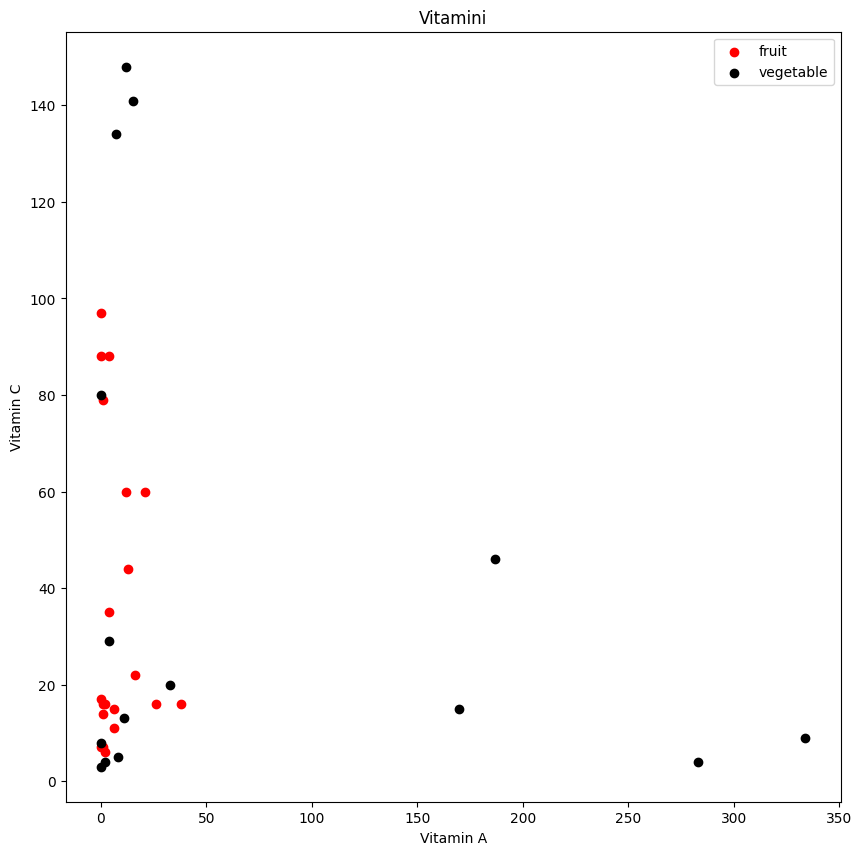

In [37]:
import plotly.express as px
import matplotlib.pyplot as plt
Xplot1 = df[df.classification == 'fruit']
Xplot2 = df[df.classification == 'vegetable']
plt.figure(figsize = (10, 10))
f = plt.scatter(Xplot1['vitamin A %'], Xplot1['vitamin C %'], color = 'red', marker = 'o')
plt.title("Vitamini")
plt.xlabel("Vitamin A")
v = plt.scatter(Xplot2['vitamin A %'], Xplot2['vitamin C %'], color = 'black', marker = 'o')
plt.ylabel("Vitamin C")
plt.legend((f, v), ('fruit', 'vegetable'))
plt.show()

Користејќи ја библиотеката `sklearn`,  вчитајте класификатор - дрво за одлучување, претставен преку класата `DecisionTreeClassifier`, а потоа вметнете ги податоците за тренирање од вториот чекор за да ја истренирате мрежата.

- [Пример за дрва за одлучување од sklearn](https://scikit-learn.org/stable/modules/tree.html)
- [Документација за Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [78]:
clf = DecisionTreeClassifier(criterion = 'entropy')

In [79]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [80]:
y_pred =  clf.predict(x_test)

Пресметајте ја прецизноста на алгоритамот за податоците кои тој ги нема видено (на кои нема тренирано). Потоа пресметајте ја прецизноста на алгоритамот за податоците кои ги има видено (на кои има тренирано). Споредете ги резултатите. Ви изгледаат ли во ред?

In [81]:
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(x_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.6363636363636364


ne izgledaat vo red zatoa shto testiranite podatoci imaat tochnost 0.63 shto ne e dovolno blisku do 1

Кои производи алгоритамот успева да ги распознава подобро, висококалоричните (над 50 калории) или нискокалоричните (под 50 калории)?

In [73]:
df['callories_over_50']=df['calories (per 100g)']>50
df=df[['vitamin A %','vitamin C %','calcium %','iron %','magnesium %','calories (per 100g)','potassium (mg)','protein (g)','fiber (g)','classification','callories_over_50']]
df

,vitamin A %,vitamin C %,calcium %,iron %,magnesium %,calories (per 100g),potassium (mg),protein (g),fiber (g),classification,callories_over_50
0,1.0,7.0,0.0,0.0,1.0,52.0,107.0,0.3,2.4,fruit,True
1,38.0,16.0,1.0,2.0,2.0,48.0,259.0,1.4,2.0,fruit,False
2,2.0,16.0,1.0,3.0,7.0,160.0,485.0,2.0,7.0,fruit,True
3,1.0,14.0,0.0,1.0,6.0,89.0,358.0,1.1,2.6,fruit,True
4,0.0,8.0,1.0,1.0,5.0,43.0,325.0,1.6,2.8,vegetable,False
5,4.0,35.0,2.0,3.0,5.0,43.0,163.0,1.4,5.0,fruit,False
6,1.0,16.0,0.0,1.0,1.0,57.0,77.0,0.7,2.4,fruit,True
7,12.0,148.0,4.0,3.0,5.0,34.0,316.0,2.8,2.6,vegetable,False
8,15.0,141.0,4.0,7.0,5.0,43.0,389.0,3.4,3.8,vegetable,False
9,334.0,9.0,3.0,1.0,3.0,41.0,320.0,0.9,2.8,vegetable,False


In [44]:
output_column = 'classification'
class_1 = 'fruit'
class_2 = 'vegetable'
h_before_split=entropy_of_dataset(df, output_column, class_1, class_2)
h_before_split

0.9852281360342515

In [74]:
calories_over_50 = df.query("callories_over_50 == 'True'")
calories_under_50 = df.query("callories_over_50 == 'False'" )

In [82]:
x = calories_over_50[['vitamin A %', 'vitamin C %', 'calcium %', 'iron %', 
        'magnesium %', 'calories (per 100g)', 'potassium (mg)', 
        'protein (g)', 'fiber (g)']]
y = calories_over_50[['classification']]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=155, test_size=0.3)

print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=clf.predict(x_test)))
# eve vo koi klasi navistina spagjaat x_test podatocite, sporedi kolku tocno gi predvide
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(x_train)))

ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [45]:
calories_over_50 = df.query("callories>50 == 'True'")
calories_under_50 = df.query("callories>50 == 'False'" )
h_over=entropy_of_dataset(calories_over_50, output_column, class_1, class_2)
h_under=entropy_of_dataset(calories_under_50, output_column, class_1, class_2)
factor_over=calories_over_50.shape[0]/df.shape[0]
factor_under=calories_under_50.shape[0]/df.shape[0]
h_after_split_time=factor_over*h_over+factor_under*h_under
info_gain_time=h_before_split-h_after_split_time

UndefinedVariableError: name 'callories' is not defined

Како алгоритмите за дрва за одлучување ги употребуваат признаците (каркатеристиките) кои се континуални (а не дискретни / категорични)?

Тие не се да/не алгоритми, нема едноставен да не одговор, туку користат регресиони дрва/алгоритми кај кои одговорот на признакот се наоѓа во некоја друга одлука 
подлабоко во дрвото или пак во зависност од тоа каква одлука ќе биде донесена

Какви производи се редовите од податочното множество од датотеката `fruits_test.csv`?

In [67]:
x_test1 = pd.read_csv('data/fruits_train.csv')
y_predict =  clf.predict(x_test1)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- classification


# Ispitna
Дадено е влезно-излезното множество за обучување од долната таблица со $12$ податоци, од кои $6$ се позитивни $(y = 1)$, а $6$ се негативни $(y = 0)$. Влезниот вектор има три карактеристики $x_1$, $x_2$ и $x_3$ .

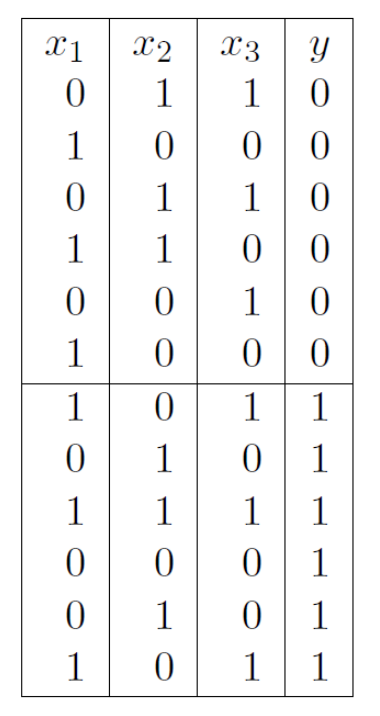

In [84]:
from IPython import display
display.Image('images/3-1.png', width=240)

Во продолжение е даден бројот позитивни и негативни примероци во кои секоја од влезните карактеристики има вредност $1$.

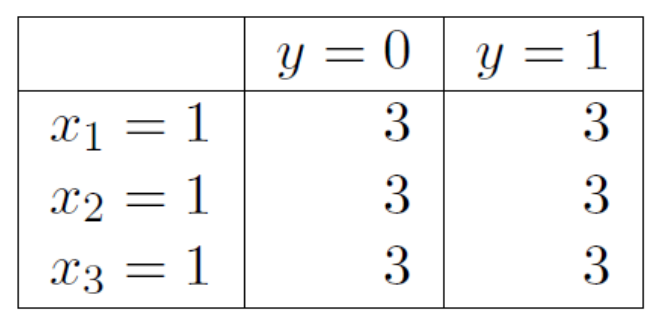

In [85]:
from IPython import display
display.Image('images/3-2.png', width=300)

Дали проблемот може да се реши со стебло на одлучување? Во случај на позитивен одговор, да се нацрта соодветното стебло.

Da mozhe,

In [86]:
import numpy as np
import pandas as pd

In [95]:
df=pd.DataFrame(
    [[0,1,1,0],
     [1,0,0,0],
     [0,1,1,0],
     [1,1,0,0],
     [0,0,1,0],
     [1,0,0,0],
     [1,0,1,1],
     [0,1,0,1],
     [1,1,1,1],
     [0,0,0,1],
     [0,1,0,1],
     [1,0,1,1]],columns=['x1','x2','x3','y'])
df

,x1,x2,x3,y
0,0,1,1,0
1,1,0,0,0
2,0,1,1,0
3,1,1,0,0
4,0,0,1,0
5,1,0,0,0
6,1,0,1,1
7,0,1,0,1
8,1,1,1,1
9,0,0,0,1


In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [101]:
x=df.drop(columns = 'y') 
y=df[['y']]

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=13, test_size=0.3)

In [103]:
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [104]:
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=clf.predict(x_test)))
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(x_train)))

Accuracy Score on test data:  1.0
Accuracy Score on train data:  1.0


# Ispitna2
Дадено е следното влезно излезно множество податоци кое кажува како Стефан би постапил во случајот да добие понуда за работа под одредени услови. Да се состави соодветно стебло на одлучување врз основа на даденото влезно-излезно множество, кое ќе овозможи да заклучиме дали Стефан ќе ја прифати новата понуда за работа со плата < 30000ден, далеку од местото на живеење, но со платен превоз.

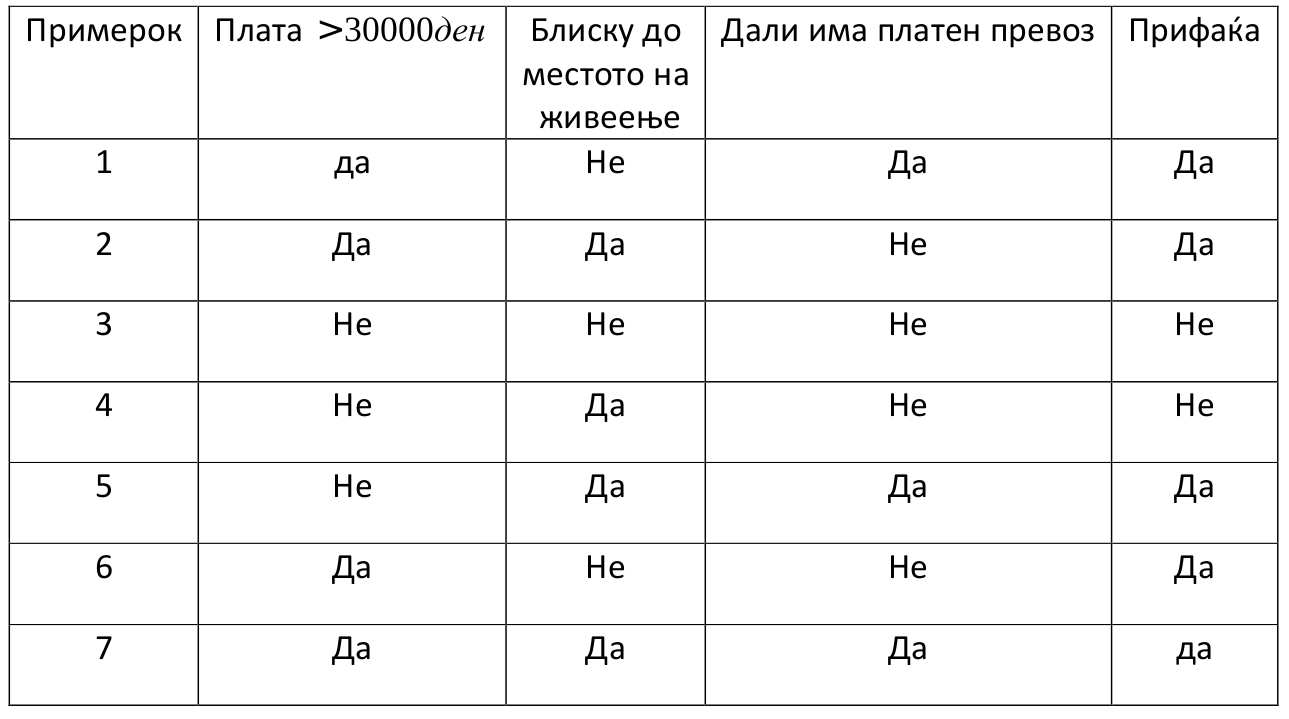

In [107]:
from IPython import display
display.Image('images/stefan.png', width=600)

In [108]:
import numpy as np
import pandas as pd

In [111]:
df=pd.DataFrame([
    [True,False,True,True],
    [True,True,False,True],
    [False,False,False,False],
    [False,True,False,False],
    [False,True,True,True],
    [True,False,False,True],
    [True,True,True,True]],columns=['plata>30000','blisku','prevoz','prifakja'])
df

,plata>30000,blisku,prevoz,prifakja
0,True,False,True,True
1,True,True,False,True
2,False,False,False,False
3,False,True,False,False
4,False,True,True,True
5,True,False,False,True
6,True,True,True,True


In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [129]:
x=df.drop(columns='prifakja')
y=df['prifakja']

In [134]:
x

,plata>30000,blisku,prevoz
0,True,False,True
1,True,True,False
2,False,False,False
3,False,True,False
4,False,True,True
5,True,False,False
6,True,True,True


In [135]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=17, test_size=0.5)

In [136]:
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [137]:
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=clf.predict(x_test)))
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(x_train)))

Accuracy Score on test data:  0.5
Accuracy Score on train data:  1.0


In [139]:
clf.predict([[False, False, True]])

/home/melanicvetkovska/miniconda3/envs/mel/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array([1.])

# Државни патишта

Податоците за државните патишта кои можете да ги најдете на страната на Државни патишта се сместени во папката `roads` во `data`. Искористете ги податоците за да ја најдете најкратката патека од еден град до друг, на пример од Скопје до Пробиштип. Сите датотеки за наслов ја имаат кратенката на патот. Во датотеката `roads_info.csv` се содржани кратенките на патиштата и соодветниот опис за секој пат.

In [24]:
import pandas as pd
from plotly import graph_objects as go

In [25]:
class WeightedGraph:
    def __init__(self):
        self.graph_dict = {}
    
    def add_vertex(self, vertex):
        if vertex not in self.graph_dict:
            self.graph_dict[vertex] = {}
    
    def vertices(self):
        return list(self.graph_dict.keys())
    
    def add_edge(self, edge, add_reversed=True):
        vertex1, vertex2, weight = edge
        self.graph_dict[vertex1][vertex2] = weight
        if add_reversed:
            self.graph_dict[vertex2][vertex1] = weight
    
    def edges(self):
        edges = []
        for vertex in self.graph_dict:
            for neighbour, weight in self.graph_dict[vertex].items():
                edges.append((vertex, neighbour, weight))
        return edges
    
    def neighbours(self, vertex):
        return list(self.graph_dict[vertex].items())

In [29]:
g = WeightedGraph()
files = pd.read_csv('roads/roads_info.csv')['Кратенка']
for file in files:
    df = pd.read_csv(f'roads/{file}.csv')
    df['ОД'] = df['ЈАЗОЛ НА ПОЧЕТОКОТ']
    df['ДО'] = df['ЈАЗОЛ НА КРАЈОТ']
    for row in df.itertuples():
        g.add_vertex(row.ОД)
        g.add_vertex(row.ДО)
        g.add_edge((row.ОД, row.ДО, row.ДОЛЖИНА))

In [9]:
def city(graph,city):
    for vertex in graph.vertices():
        if city.lower() in vertex.lower():
            return vertex

In [11]:
# so uniformna cena
import heapq
def uniform_cost_search(starting_vertex, goal_vertex):
    if starting_vertex == goal_vertex:
        return []
    expanded = set()
    queue = [(0, [starting_vertex])]
    heapq.heapify(queue)
    while queue:
        weight, vertex_list = heapq.heappop(queue) 
        vertex_to_expand = vertex_list[-1]
        if vertex_to_expand == goal_vertex:
            return weight, vertex_list
        if vertex_to_expand not in expanded:
            for new_weight, neighbour in graph.neighbours(vertex_to_expand):
                if neighbour not in expanded: 
                    heapq.heappush(queue, (weight + new_weight, vertex_list + [neighbour]))
        expanded.add(vertex_to_expand)

## Најкраток пат со А*

Во датотеката `coordinates.csv` се сместени X и Y координатите на секоја клучка. Координатите се `Гаус-Кригерови координати, 7-ма зона` (не пишува на страната на ЈП Државни Патишта, прашав геодет), па директно можете да ја примените равенката за евклидово растојание врз координатите. Искористете ја оваа дојава (евристика) за местоположбата на клучките и конструирајте А* алгоритам кој ќе го најде најкраткиот пат од едно до друго населено место.

In [21]:
df = pd.read_csv('roads/coordinates.csv')

def eucledian_distance(vertex1, vertex2):
    vertex1 = int(vertex1.split('-')[0])
    vertex2 = int(vertex2.split('-')[0])
    vertex1 = df.query(f'Јазол == {vertex1}')
    vertex2 = df.query(f'Јазол == {vertex2}')
    import math
    delta_x_squared = math.pow(float(vertex1.X) - float(vertex2.X), 2)
    delta_y_squared = math.pow(float(vertex1.Y) - float(vertex2.Y), 2)
    return math.sqrt(delta_x_squared + delta_y_squared)

eucledian_distance('364 - Пробиштип', '378 - Старо Нагоричане 1')

36229.390811682366

In [ ]:
def a_star_search(graph, starting_vertex, goal_vertex, alpha=1):
    if starting_vertex == goal_vertex:
        return []
    expanded = set()
    queue = [((0, 0), [starting_vertex])]
    heapq.heapify(queue)
    while queue:
        weight_tuple, vertex_list = heapq.heappop(queue)
        current_a_star_weight, current_path_weight = weight_tuple
        vertex_to_expand = vertex_list[-1]
        if vertex_to_expand == goal_vertex:
            return current_path_weight, vertex_list
        if vertex_to_expand not in expanded:
            for neighbour, new_weight in graph.neighbours(vertex_to_expand):
                if neighbour not in expanded:
                    path_weight = current_path_weight + new_weight
                    a_star_weight = path_weight + alpha * eucledian_distance(neighbour, goal_vertex)
                    heapq.heappush(queue, ((a_star_weight, path_weight), vertex_list + [neighbour]))
        expanded.add(vertex_to_expand)

In [28]:
# sega so menheten
import math
df = pd.read_csv('roads/coordinates.csv')
def manhattan_distance(vertex1, vertex2):
    vertex1 = int(vertex1.split('-')[0])
    vertex2 = int(vertex2.split('-')[0])
    vertex1 = df.query(f'Јазол == {vertex1}')
    vertex2 = df.query(f'Јазол == {vertex2}')
    return abs(float(vertex1.X) - float(vertex2.X)) + abs(float(vertex1.Y) - float(vertex1.Y))
manhattan_distance('364 - Пробиштип', '378 - Старо Нагоричане 1')

29499.83999999985

In [23]:
def a_star_search(graph, starting_vertex, goal_vertex, alpha=1):
    if starting_vertex == goal_vertex:
        return []
    expanded = set()
    queue = [((0, 0), [starting_vertex])]
    heapq.heapify(queue)
    while queue:
        weight_tuple, vertex_list = heapq.heappop(queue)
        current_a_star_weight, current_path_weight = weight_tuple
        vertex_to_expand = vertex_list[-1]
        if vertex_to_expand == goal_vertex:
            return current_path_weight, vertex_list
        if vertex_to_expand not in expanded:
            for neighbour, new_weight in graph.neighbours(vertex_to_expand):
                if neighbour not in expanded:
                    path_weight = current_path_weight + new_weight
                    a_star_weight = path_weight + alpha * manhattan_distance(neighbour, goal_vertex)
                    heapq.heappush(queue, ((a_star_weight, path_weight), vertex_list + [neighbour]))
        expanded.add(vertex_to_expand)

In [ ]:
starting_vertex='364 - Пробиштип' 
goal_vertex='378 - Старо Нагоричане 1'
a_star_search(g, starting_vertex, goal_vertex, alpha=1)

In [ ]:
(59429,
 ['364 - Пробиштип',
  '363 - Кратово',
  '362 - Живалево',
  '193 - Страцин (Крилатица)',
  '194 - Војник',
  '195 - Младо Нагоричане',
  '378 - Старо Нагоричане 1'])